# Семинар №1. Введение в МатСтат

План
- Описательные статистики и визуализация
- Динозавр и его 13 ликов
- Корреляция


Импортим либы

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

Качаем данные для семинара

In [ ]:
!wget -O datasaurus.csv https://www.openintro.org/data/csv/datasaurus.csv
!curl -O https://raw.githubusercontent.com/practical-jupyter/sample-data/refs/heads/master/anime/anime.csv >> anime.csv

--2024-10-04 16:02:09--  https://www.openintro.org/data/csv/datasaurus.csv
Resolving www.openintro.org (www.openintro.org)... 192.185.65.127
Connecting to www.openintro.org (www.openintro.org)|192.185.65.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64110 (63K) [text/csv]
Saving to: ‘datasaurus.csv’

datasaurus.csv      100%[===================>]  62.61K  --.-KB/s    in 0.03s   

2024-10-04 16:02:09 (1.91 MB/s) - ‘datasaurus.csv’ saved [64110/64110]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  778k  100  778k    0     0  1256k      0 --:--:-- --:--:-- --:--:-- 1258k


In [ ]:
!ls -lah

total 860K
drwxr-xr-x 1 root root 4.0K Oct  4 16:02 .
drwxr-xr-x 1 root root 4.0K Oct  4 15:57 ..
-rw-r--r-- 1 root root 779K Oct  4 16:02 anime.csv
drwxr-xr-x 4 root root 4.0K Oct  2 13:25 .config
-rw-r--r-- 1 root root  63K Aug 28  2022 datasaurus.csv
drwxr-xr-x 1 root root 4.0K Oct  2 13:25 sample_data


## Описательные статистики

In [ ]:
!head -n5 anime.csv

anime_id,name,genre,type,episodes,rating,members
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [ ]:
df = pd.read_csv('anime.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10486 entries, 0 to 10485
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10486 non-null  int64  
 1   name      10486 non-null  object 
 2   genre     10424 non-null  object 
 3   type      10463 non-null  object 
 4   episodes  10486 non-null  object 
 5   rating    10275 non-null  float64
 6   members   10486 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 573.6+ KB


In [ ]:
df.shape

(10486, 7)

In [ ]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

- `anime_id` - ID
- `name` - название
- `genre` - жанр
- `type` - формат
- `episodes` - кол-во эпизодов
- `rating` - средний рейтинг
- `members` - кол-во смотрящих

In [ ]:
df.dtypes

,0
anime_id,int64
name,object
genre,object
type,object
episodes,object
rating,float64
members,int64


In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df['episodes'].value_counts()

,count
episodes,
1,5149
12,666
13,532
2,511
26,504
...,...
366,1
201,1
331,1


In [ ]:
errors = set()
for i in df['episodes'].unique():
    try:
        ii = int(i)
    except:
        errors.add(i)

errors

{'Unknown'}

In [ ]:
df['episodes'] = df['episodes'].replace('Unknown', '-1').astype(np.int32)

### Меры центральной тенденции

In [ ]:
df['rating'].mean()

6.493898783454988

In [ ]:
df.rating.mean()

6.493898783454988

In [ ]:
m = df['rating'].mean()
med = df['rating'].median()
m, med

(6.493898783454988, 6.6)

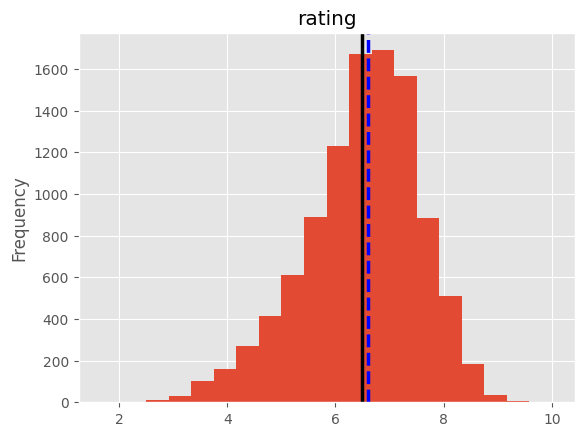

In [ ]:
ax = df['rating'].plot(kind='hist', bins=20, title='rating')
ax = plt.axvline(m, c='k', ls='-', lw=2.5)
ax = plt.axvline(med, c='blue', ls='--', lw=2.5)

In [ ]:
m = df['members'].mean()
med = df['members'].median()
m, med

(18478.925805836352, 1197.5)

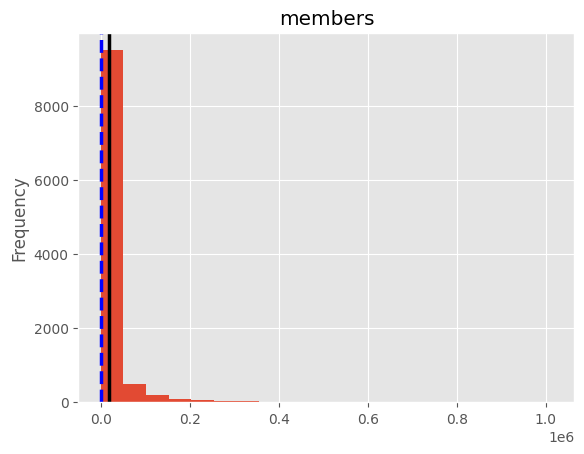

In [ ]:
ax = df['members'].plot(kind='hist', bins=20, title='members')
ax = plt.axvline(m, c='k', ls='-', lw=2.5)
ax = plt.axvline(med, c='blue', ls='--', lw=2.5)

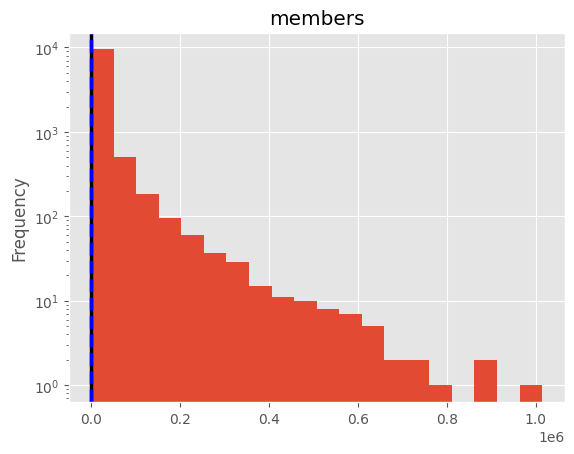

In [ ]:
ax = df['members'].plot(kind='hist', bins=20, log=True, title='members')
ax = plt.axvline(m, c='k', ls='-', lw=2.5)
ax = plt.axvline(med, c='blue', ls='--', lw=2.5)

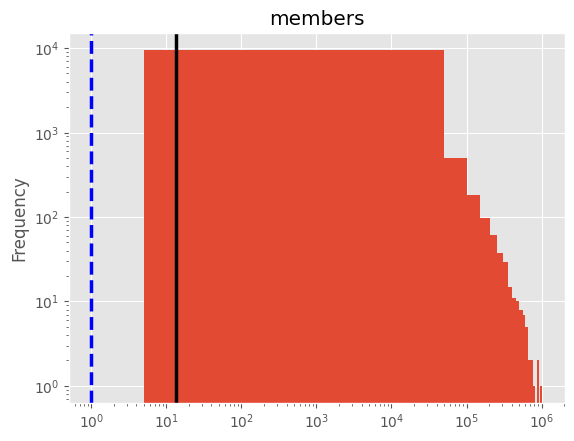

In [ ]:
ax = df['members'].plot(kind='hist', bins=20, logx=True, logy=True, title='members')
ax = plt.axvline(m, c='k', ls='-', lw=2.5)
ax = plt.axvline(med, c='blue', ls='--', lw=2.5)

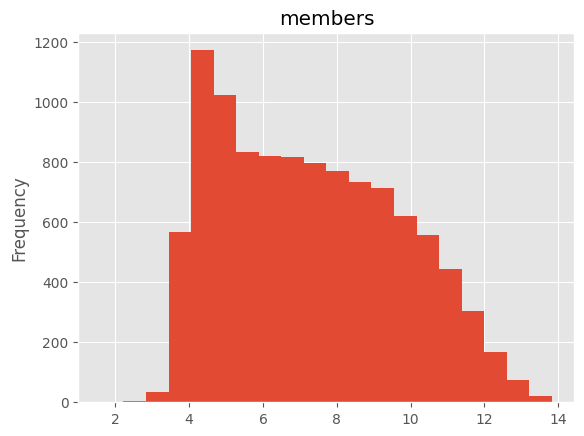

In [ ]:
ax = np.log(df['members']).plot(kind='hist', bins=20, title='members')
#ax = plt.axvline(m, c='k', ls='-', lw=2.5)
#ax = plt.axvline(med, c='blue', ls='--', lw=2.5)

### Меры разброса

In [ ]:
df['members'].min(), df['members'].max()

(5, 1013917)

In [ ]:
# размах
df['members'].max() - df['members'].min()

1013912

In [ ]:
df[df['members'] > 1e6]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


In [ ]:
# дисперсия
df['members'].var(ddof=0)

3198656568.021727

In [ ]:
# несмещённая дисперсия
df['members'].var(ddof=1)

3198961637.7945476

In [ ]:
df['members'].var(ddof=1) - df['members'].var(ddof=0)

305069.7728204727

In [ ]:
# стандартное отклонение
df['members'].std(ddof=0), df['members'].std(ddof=1)

(56556.66687510613, 56559.36383831193)

In [ ]:
df['members'].std(ddof=1) - df['members'].std(ddof=0)

2.6969632058026036

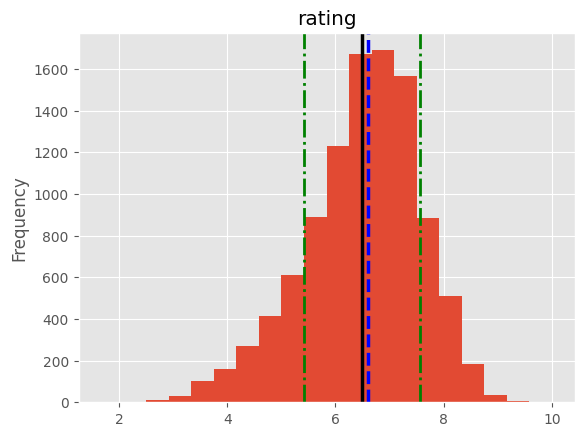

In [ ]:
col = 'rating'
m = df[col].mean()
med = df[col].median()
std = df[col].std()
ax = df[col].plot(kind='hist', bins=20, title=col)
ax = plt.axvline(m, c='k', ls='-', lw=2.5)
ax = plt.axvline(med, c='blue', ls='--', lw=2.5)
ax = plt.axvline(m + std, c='green', ls='-.', lw=2)
ax = plt.axvline(m - std, c='green', ls='-.', lw=2)

In [ ]:
m, std, med

(6.493898783454988, 1.0665507971740387, 6.6)

In [ ]:
m - std, m, m + std,

(5.4273479862809495, 6.493898783454988, 7.560449580629026)

### Квантили

In [ ]:
df['rating'].quantile(0.5), med

(6.6, 6.6)

In [ ]:
df['rating'].quantile(0.25), df['rating'].quantile(0.75)

(5.87, 7.25)

In [ ]:
# интерквантильный размах
df['rating'].quantile(0.75) - df['rating'].quantile(0.25)

1.38

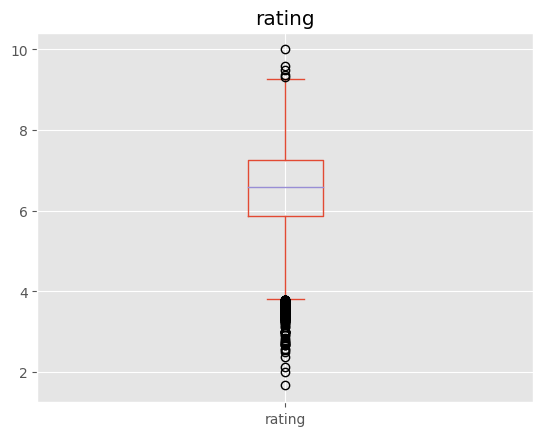

In [ ]:
ax = df[col].plot(kind='box', title=col)

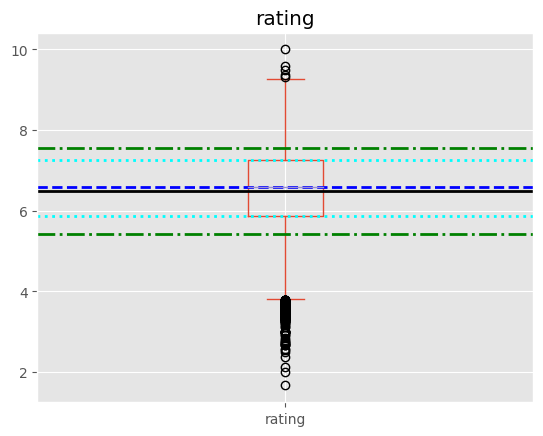

In [ ]:
col = 'rating'
m = df[col].mean()
med = df[col].median()
std = df[col].std()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)

ax = df[col].plot(kind='box', title=col)

ax = plt.axhline(m, c='k', ls='-', lw=2)
ax = plt.axhline(med, c='blue', ls='--', lw=2)
ax = plt.axhline(m + std, c='green', ls='-.', lw=2)
ax = plt.axhline(m - std, c='green', ls='-.', lw=2)
ax = plt.axhline(q1, c='cyan', ls=':', lw=2)
ax = plt.axhline(q3, c='cyan', ls=':', lw=2)

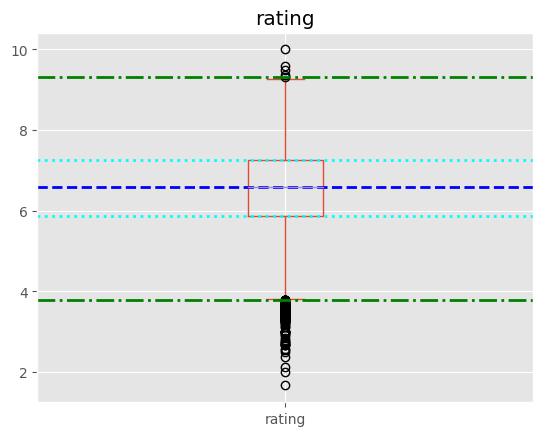

In [ ]:
iqr = q3 - q1

ax = df[col].plot(kind='box', title=col)

ax = plt.axhline(med, c='blue', ls='--', lw=2)
ax = plt.axhline(q1, c='cyan', ls=':', lw=2)
ax = plt.axhline(q3, c='cyan', ls=':', lw=2)
ax = plt.axhline(q1 - 1.5 * iqr, c='green', ls='-.', lw=2)
ax = plt.axhline(q3 + 1.5 * iqr, c='green', ls='-.', lw=2)

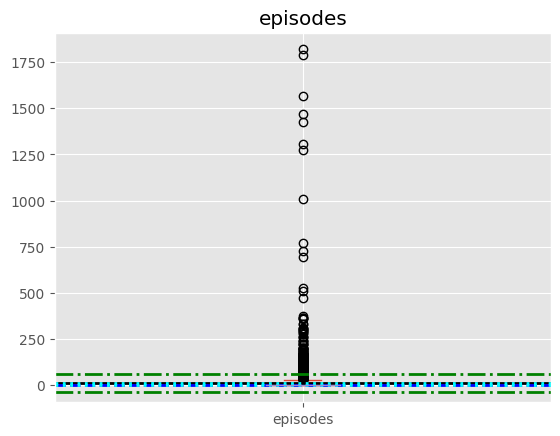

In [ ]:
col = 'episodes'
m = df[col].mean()
med = df[col].median()
std = df[col].std()
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)

ax = df[col].plot(kind='box', title=col)

ax = plt.axhline(m, c='k', ls='-', lw=2)
ax = plt.axhline(med, c='blue', ls='--', lw=2)
ax = plt.axhline(m + std, c='green', ls='-.', lw=2)
ax = plt.axhline(m - std, c='green', ls='-.', lw=2)
ax = plt.axhline(q1, c='cyan', ls=':', lw=2)
ax = plt.axhline(q3, c='cyan', ls=':', lw=2)

In [ ]:
df[df['episodes'] > 1500]

,anime_id,name,genre,type,episodes,rating,members
904,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787,7.76,14233
5809,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160
8639,23349,Kirin Monoshiri Yakata,Kids,TV,1565,5.56,116


### Pandas describe

In [ ]:
df.describe()

,anime_id,episodes,rating,members
count,10486.000000,10486.000000,10275.000000,1.048600e+04
mean,14697.595461,13.396147,6.493899,1.847893e+04
std,11594.539648,49.893610,1.066551,5.655936e+04
min,1.000000,-1.000000,1.670000,5.000000e+00
25%,3615.750000,1.000000,5.870000,1.730000e+02
50%,11065.000000,1.000000,6.600000,1.197500e+03
75%,26018.500000,13.000000,7.250000,9.741750e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [ ]:
df.describe(include='object')

,name,genre,type
count,10486,10424,10463
unique,10484,2776,6
top,Saru Kani Gassen,Comedy,TV
freq,2,523,3542


### Категориальные статистики

In [ ]:
df['genre'].head()

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."


In [ ]:
df['genre'].value_counts()

,count
genre,
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
Dementia,137
...,...
"Drama, Fantasy, Psychological, Romance, Shoujo",1
"Action, Drama, Historical, Samurai, Shounen",1
"Action, Adventure, Comedy, Mecha, Shounen, Space",1


In [ ]:
genre_vc = df['genre'].str.split(',').explode().value_counts()
genre_vc

,count
genre,
Comedy,2804
Action,2613
Sci-Fi,1846
Fantasy,1653
Shounen,1539
...,...
Police,1
Thriller,1
Super Power,1


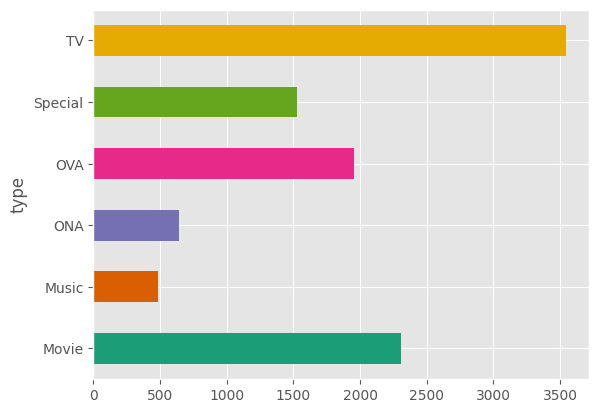

In [ ]:
ax = df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

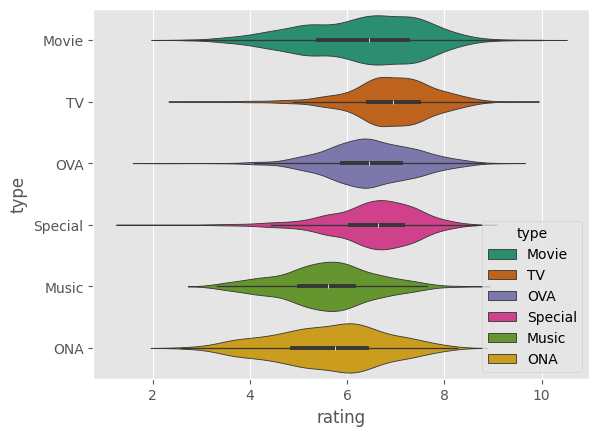

In [ ]:
ax = sns.violinplot(df, x='rating', y='type', hue='type', inner='box', palette='Dark2')

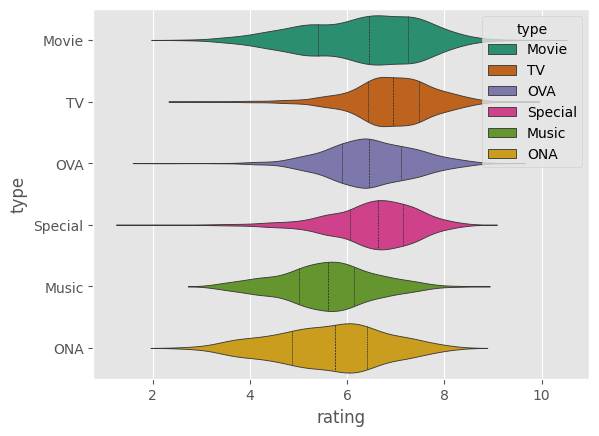

In [ ]:
ax = sns.violinplot(df, x='rating', y='type', hue='type', inner='quartile', palette='Dark2')

## Динозавр

По следам статьи - https://www.research.autodesk.com/publications/same-stats-different-graphs/

In [ ]:
df = pd.read_csv('datasaurus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


In [ ]:
df.tail()

,dataset,x,y
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751
1845,wide_lines,34.583829,89.588902


In [ ]:
df.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


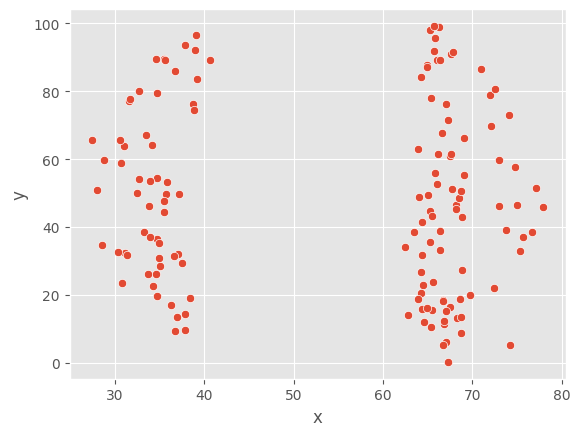

In [ ]:
ax = sns.scatterplot(x='x', y='y', data=df[df['dataset'] == 'wide_lines'])

In [ ]:
df['dataset'].value_counts()

,count
dataset,
dino,142
away,142
h_lines,142
v_lines,142
x_shape,142
star,142
high_lines,142
dots,142
circle,142


In [ ]:
def get_dataset(df, dataset_name):
    return df.loc[df['dataset'] == dataset_name, ['x', 'y']]

In [ ]:
d = get_dataset(df, 'star')

In [ ]:
d.mean()

,0
x,54.267341
y,47.839545


In [ ]:
d.std()

,0
x,16.768959
y,26.930275


In [ ]:
df.groupby('dataset').agg(['mean', 'std'])

x                     y           
                 mean        std       mean        std
dataset                                               
away        54.266100  16.769825  47.834721  26.939743
bullseye    54.268730  16.769239  47.830823  26.935727
circle      54.267320  16.760013  47.837717  26.930036
dino        54.263273  16.765142  47.832253  26.935403
dots        54.260303  16.767735  47.839829  26.930192
h_lines     54.261442  16.765898  47.830252  26.939876
high_lines  54.268805  16.766704  47.835450  26.939998
slant_down  54.267849  16.766759  47.835896  26.936105
slant_up    54.265882  16.768853  47.831496  26.938608
star        54.267341  16.768959  47.839545  26.930275
v_lines     54.269927  16.769959  47.836988  26.937684
wide_lines  54.266916  16.770000  47.831602  26.937902
x_shape     54.260150  16.769958  47.839717  26.930002

In [ ]:
df.groupby('dataset').agg(['mean', 'std']).round(3)

x               y        
              mean     std    mean     std
dataset                                   
away        54.266  16.770  47.835  26.940
bullseye    54.269  16.769  47.831  26.936
circle      54.267  16.760  47.838  26.930
dino        54.263  16.765  47.832  26.935
dots        54.260  16.768  47.840  26.930
h_lines     54.261  16.766  47.830  26.940
high_lines  54.269  16.767  47.835  26.940
slant_down  54.268  16.767  47.836  26.936
slant_up    54.266  16.769  47.831  26.939
star        54.267  16.769  47.840  26.930
v_lines     54.270  16.770  47.837  26.938
wide_lines  54.267  16.770  47.832  26.938
x_shape     54.260  16.770  47.840  26.930

In [ ]:
datasets = df['dataset'].unique()
datasets

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [ ]:
def get_stats(dataset):
    x_mean = dataset['x'].mean()
    y_mean = dataset['y'].mean()
    x_std = dataset['x'].std()
    y_std = dataset['y'].std()
    corr = dataset[['x', 'y']].corr().x.y
    return x_mean, y_mean, x_std, y_std, corr

In [ ]:
i = 1
d_name = datasets[i]
print(d_name)
d = get_dataset(df, d_name)

away


In [ ]:
get_stats(d)

(54.266099784204926,
 47.83472062488412,
 16.769824954157365,
 26.93974341888335,
 -0.06412835215474474)

In [ ]:
def plot_dataset(dataset, dataset_name, labels=["X Mean", "Y Mean", "X StD", "Y StD", "Corr."]):
    plt.figure(figsize=(15, 5))

    sns.scatterplot(x='x', y='y', data=dataset)

    plt.title(f'Dataset: {dataset_name}')
    plt.tight_layout()
    plt.xlim(-3, 107)
    plt.ylim(-3, 107)

    res = get_stats(df)

    fs, y_off = 16, -5
    max_label_length = max([len(l) for l in labels])

    plt.text(110, y_off + 80, labels[0].ljust(max_label_length) + ": " + format(res[0], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 65, labels[1].ljust(max_label_length) + ": " + format(res[1], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 50, labels[2].ljust(max_label_length) + ": " + format(res[2], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 35, labels[3].ljust(max_label_length) + ": " + format(res[3], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 20, labels[4].ljust(max_label_length) + ": " + format(res[4], "+.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 80, labels[0].ljust(max_label_length) + ": " + format(res[0], ".9f")[:-7],  fontsize=fs, alpha=1)
    plt.text(110, y_off + 65, labels[1].ljust(max_label_length) + ": " + format(res[1], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 50, labels[2].ljust(max_label_length) + ": " + format(res[2], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 35, labels[3].ljust(max_label_length) + ": " + format(res[3], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 20, labels[4].ljust(max_label_length) + ": " + format(res[4], "+.9f")[:-7], fontsize=fs, alpha=1)

    plt.tight_layout(rect=[0, 0, 0.6, 1])

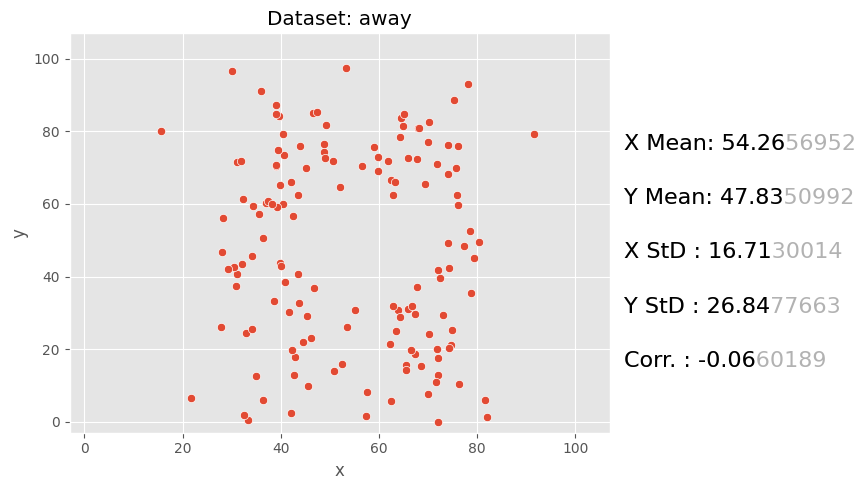

In [ ]:
plot_dataset(d, d_name)

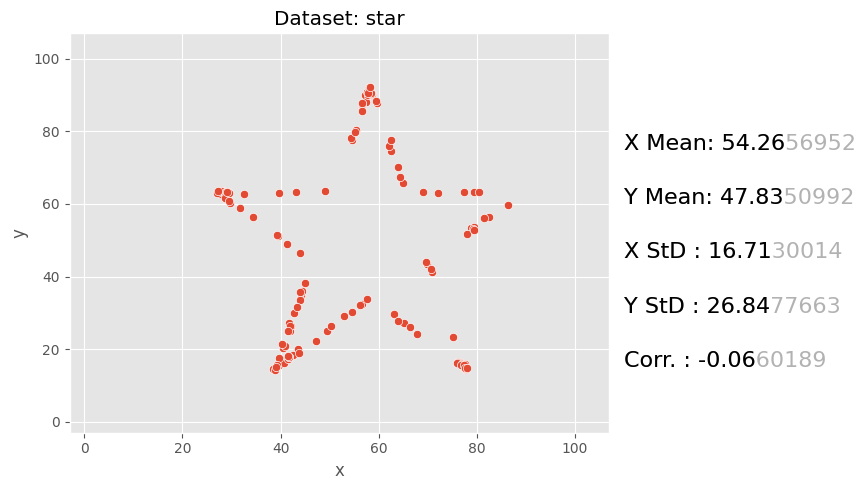

In [ ]:
i = 5
d_name = datasets[i]
d = get_dataset(df, d_name)
plot_dataset(d, d_name)

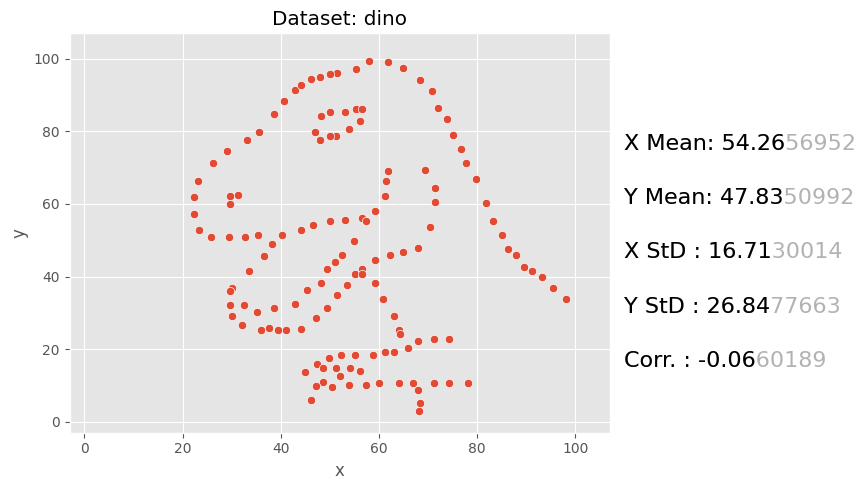

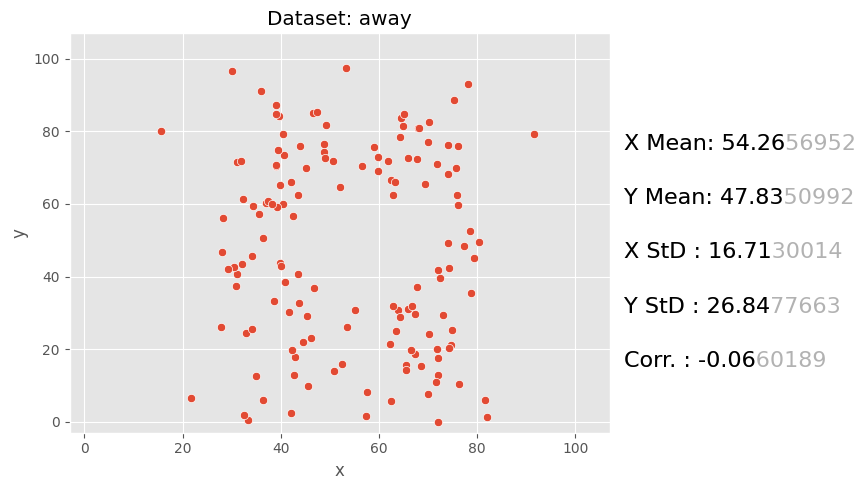

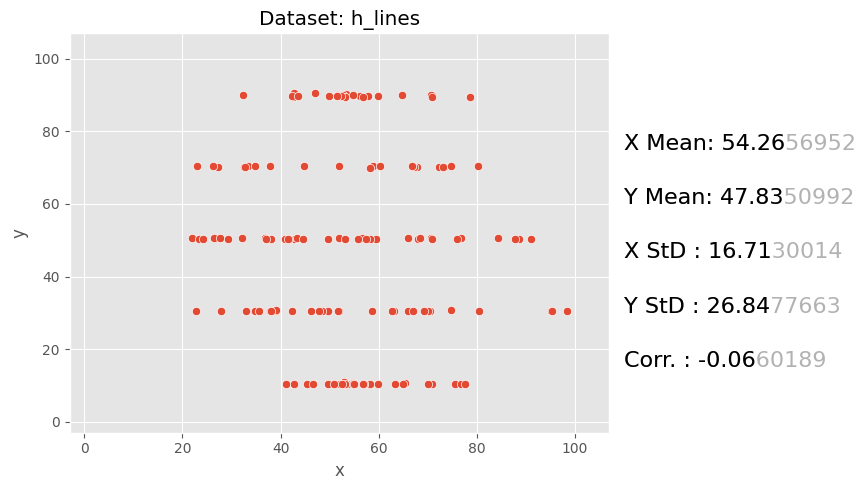

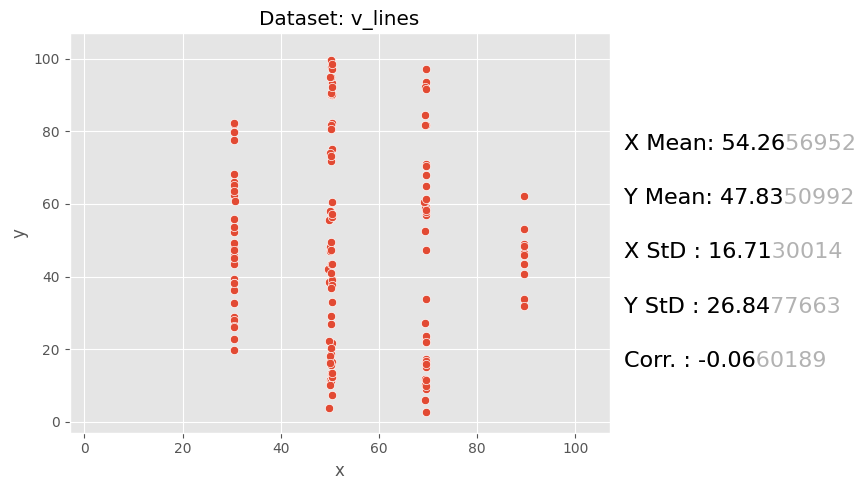

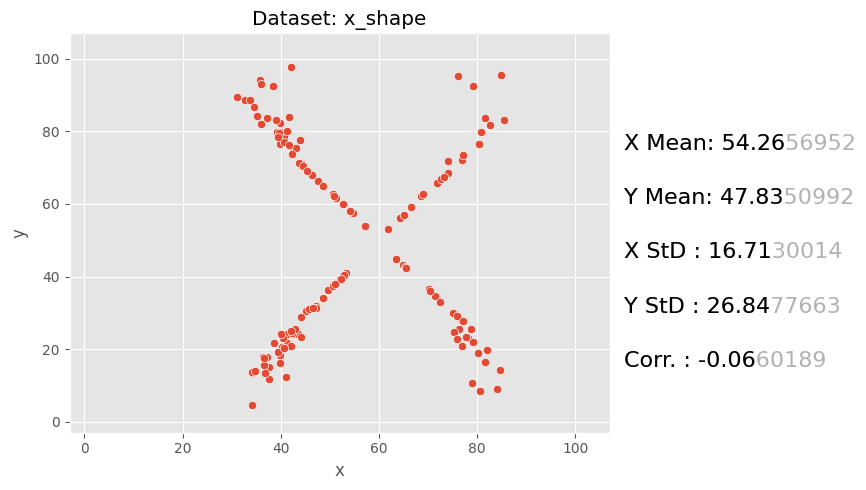

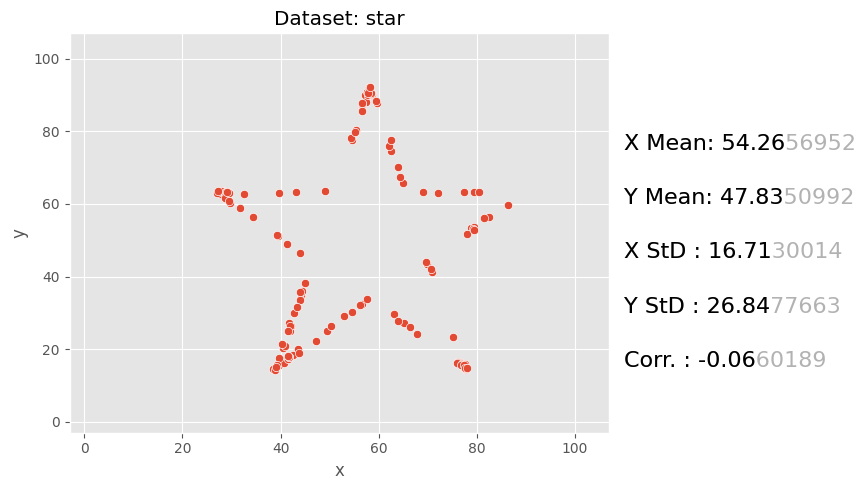

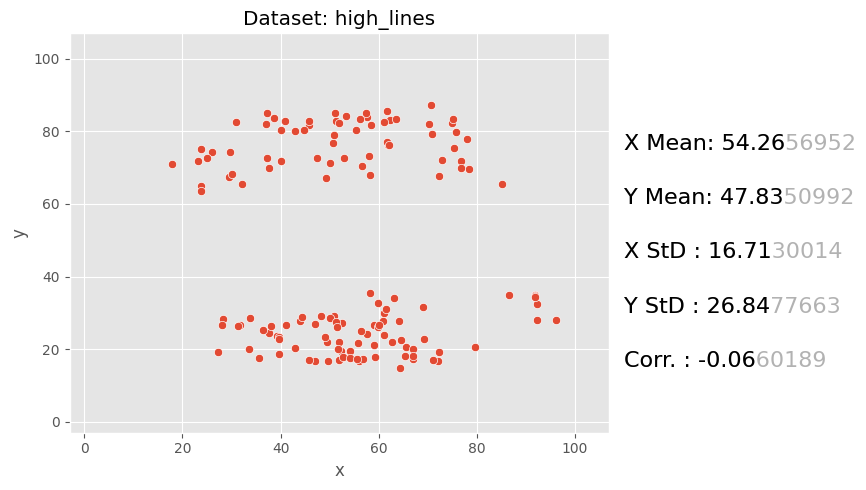

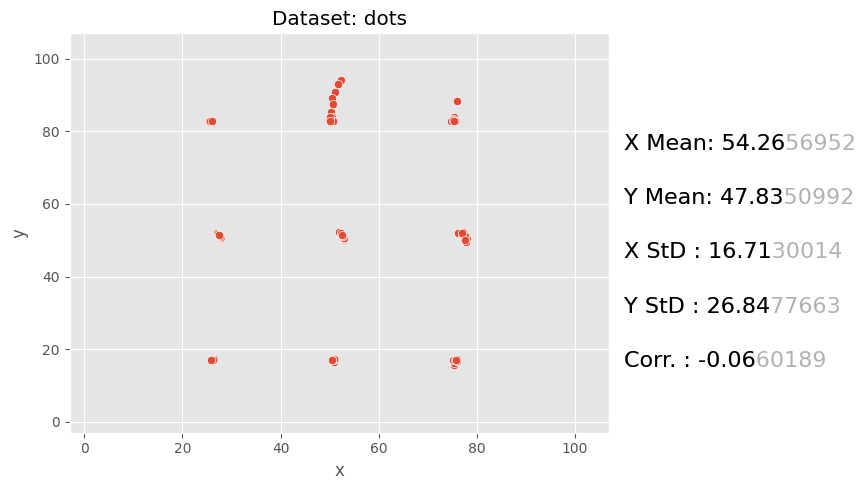

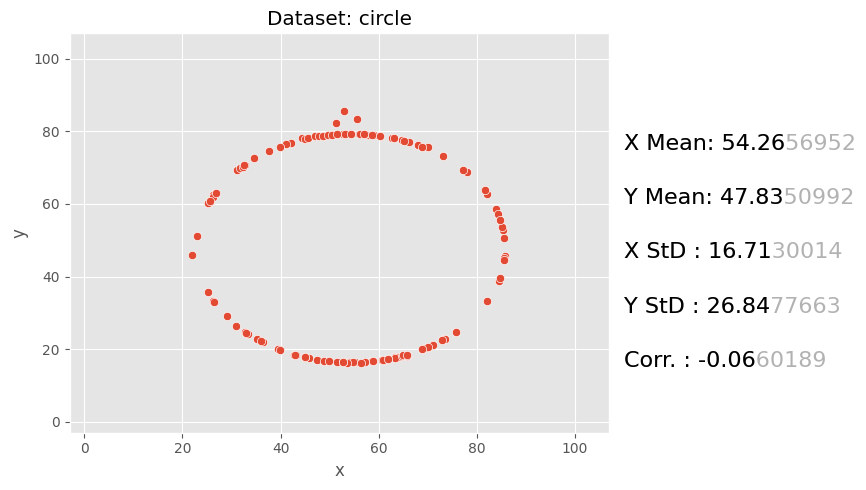

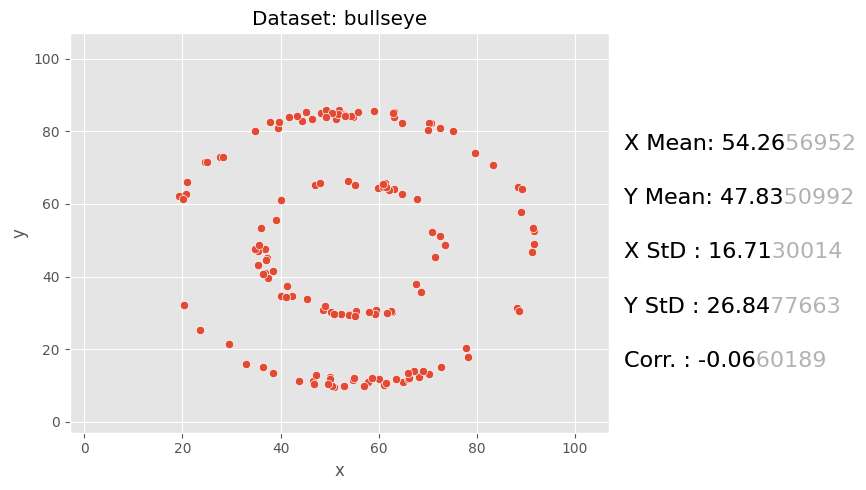

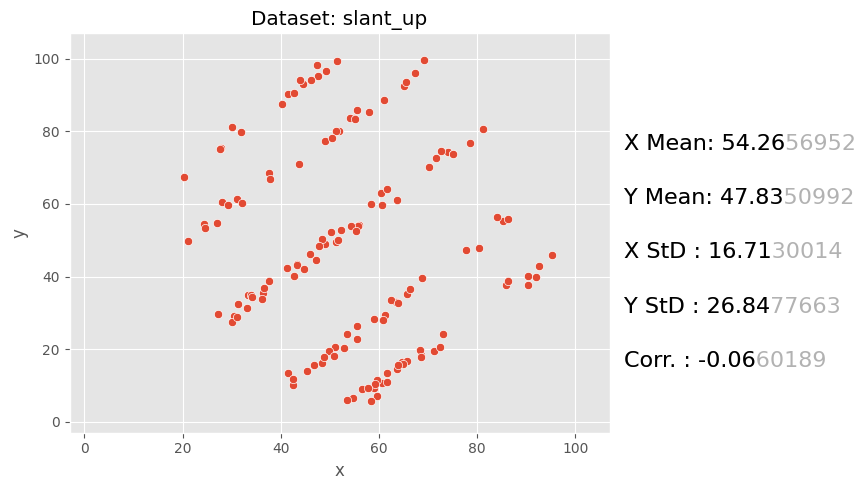

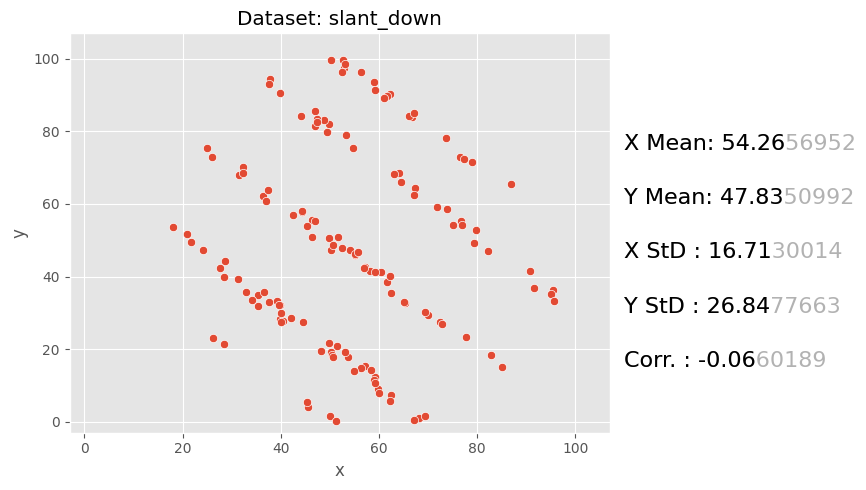

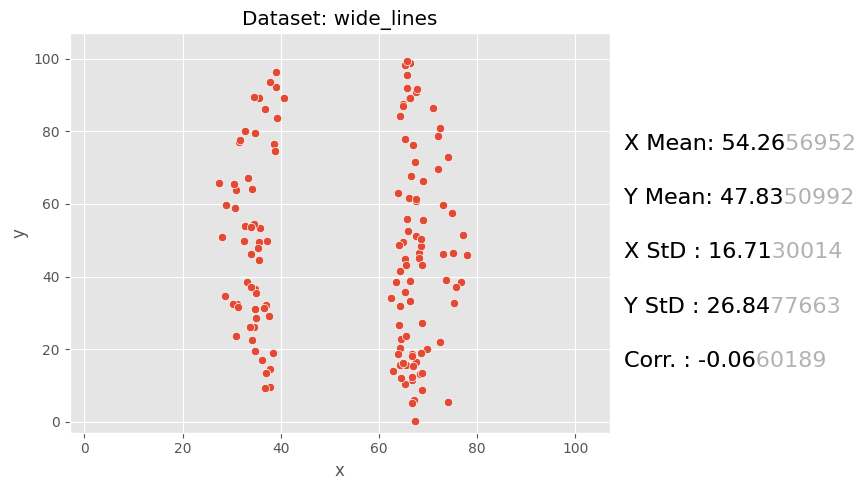

In [ ]:
for d_name in datasets:
    d = get_dataset(df, d_name)

    plot_dataset(d, d_name)

![](https://www.research.autodesk.com/app/uploads/2023/03/AllDinos-2.png)
Почему "ящик с усами" не универсален
![](https://www.research.autodesk.com/app/uploads/2023/03/boxplots-1.gif)
И еще пример
![](https://www.research.autodesk.com/app/uploads/2024/09/BoxViolinSmaller.gif)

## Корреляция

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


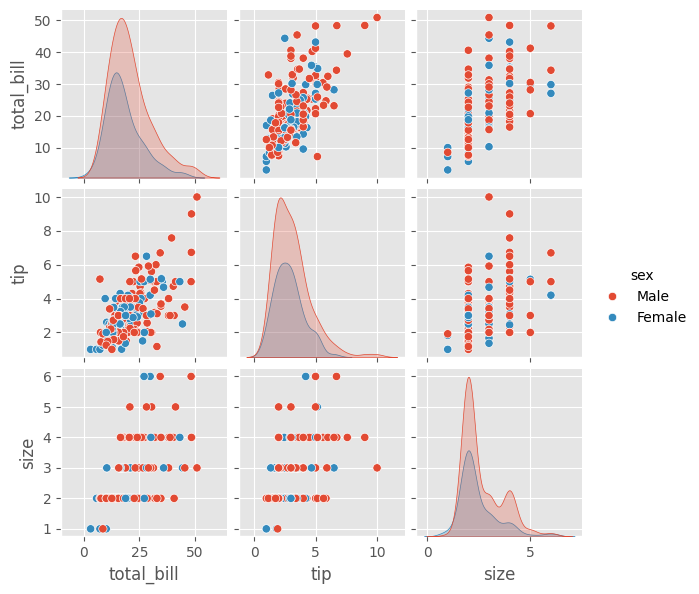

In [ ]:
ax = sns.pairplot(df, hue='sex', height=2, kind='scatter')

In [ ]:
df['tip_percent'] = df['tip'] / df['total_bill'] * 100

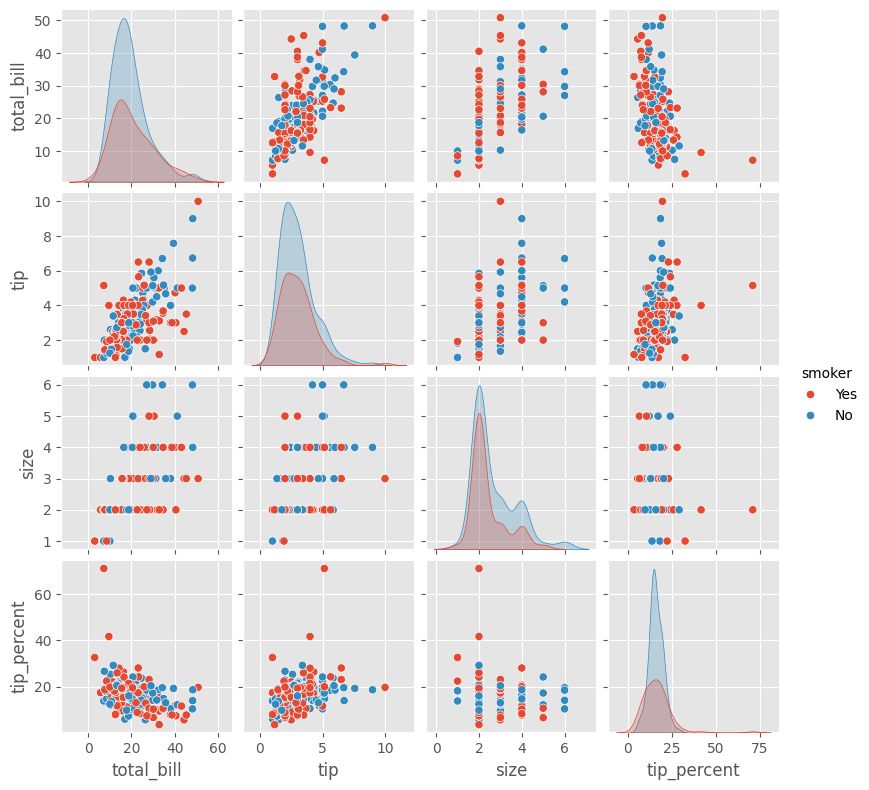

In [ ]:
ax = sns.pairplot(df, hue='smoker', height=2, kind='scatter')

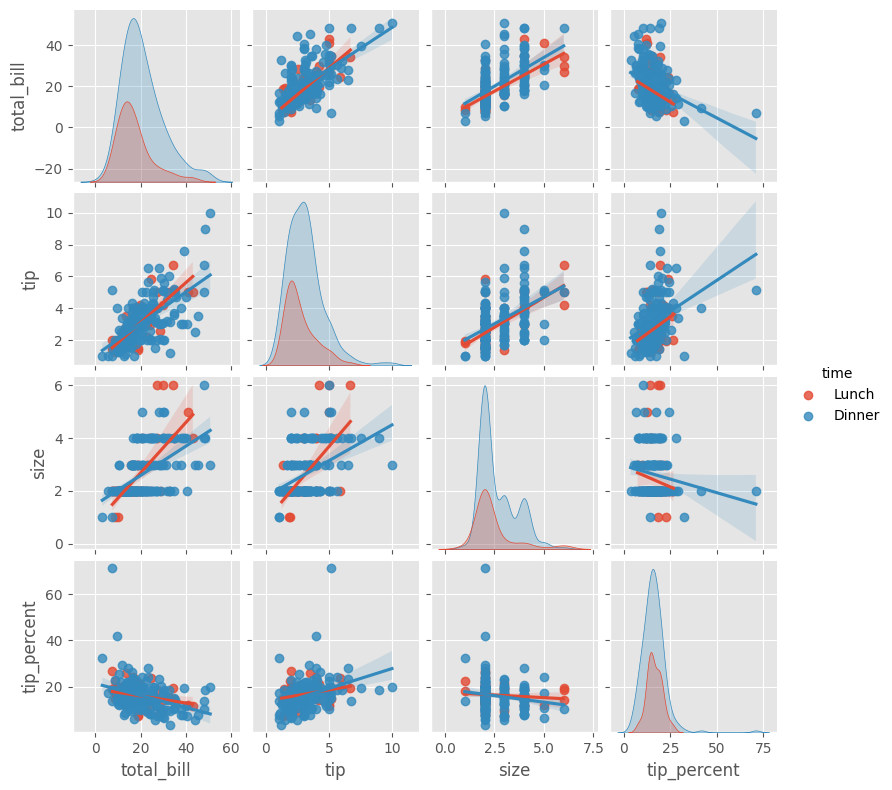

In [ ]:
ax = sns.pairplot(df, hue='time', height=2, kind='reg')

In [ ]:
df.corr(method='pearson', numeric_only=True)

,total_bill,tip,size,tip_percent
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_percent,-0.338624,0.342370,-0.142860,1.000000


In [ ]:
df.corr(method='spearman', numeric_only=True)

,total_bill,tip,size,tip_percent
total_bill,1.000000,0.678968,0.604791,-0.320680
tip,0.678968,1.000000,0.468268,0.396186
size,0.604791,0.468268,1.000000,-0.152211
tip_percent,-0.320680,0.396186,-0.152211,1.000000


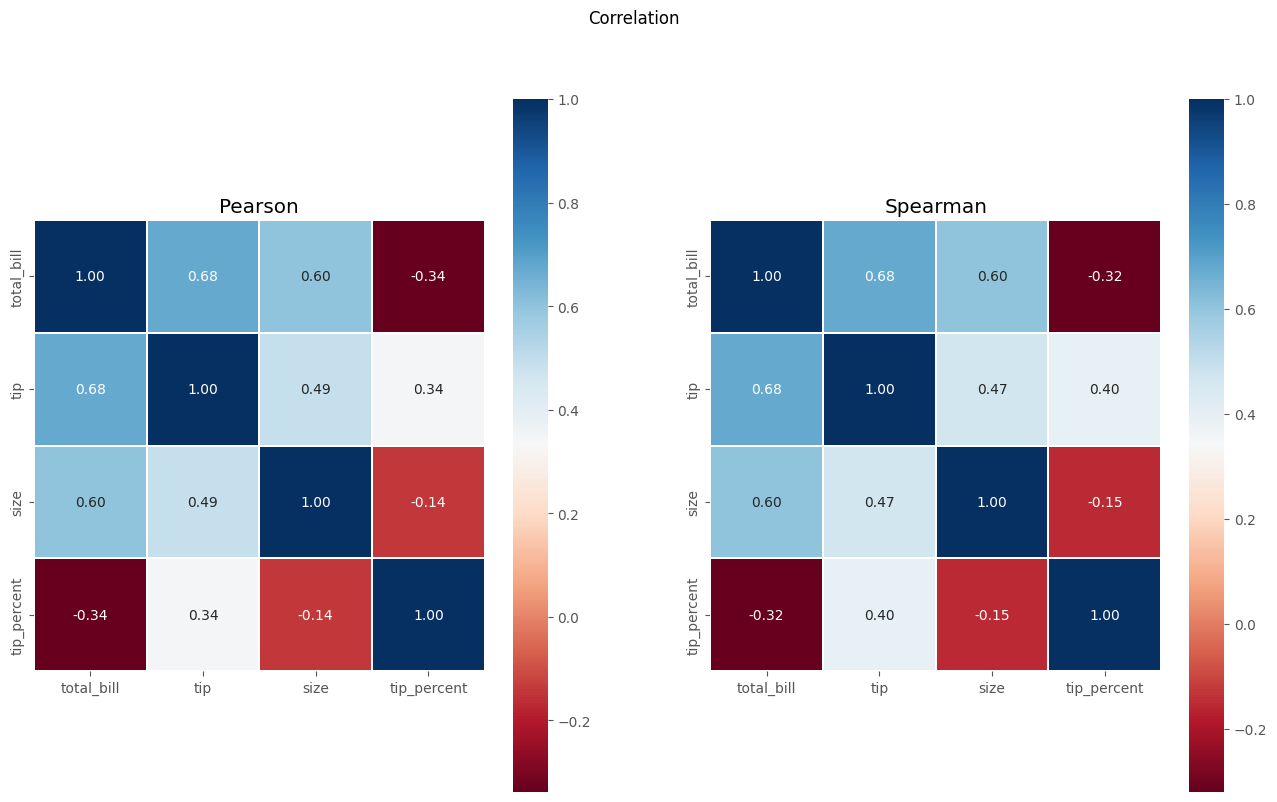

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Correlation')
ax1 = sns.heatmap(df.corr(method='pearson', numeric_only=True), ax=ax1, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
ax1 = ax1.set_title('Pearson')
ax2 = sns.heatmap(df.corr(method='spearman', numeric_only=True), ax=ax2, square=True, annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")
ax2 = ax2.set_title('Spearman')

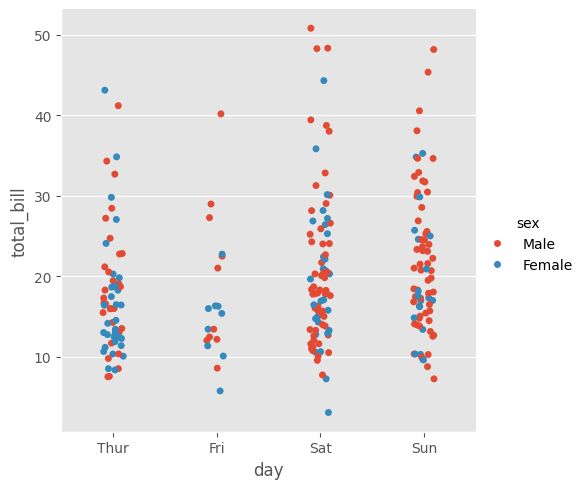

In [ ]:
ax = sns.catplot(x="day", y="total_bill", hue="sex", data=df)

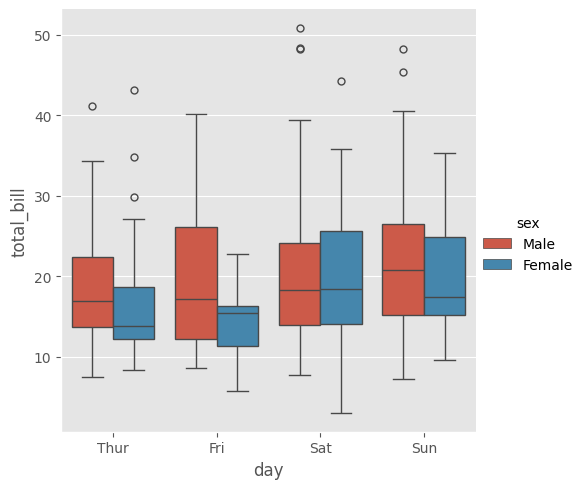

In [ ]:
ax = sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="box")

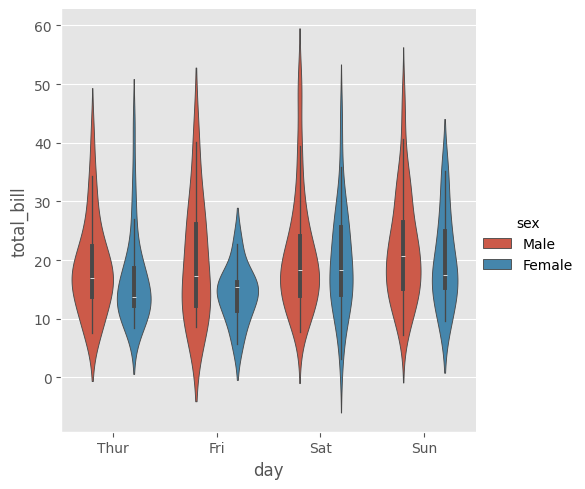

In [ ]:
ax = sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="violin")

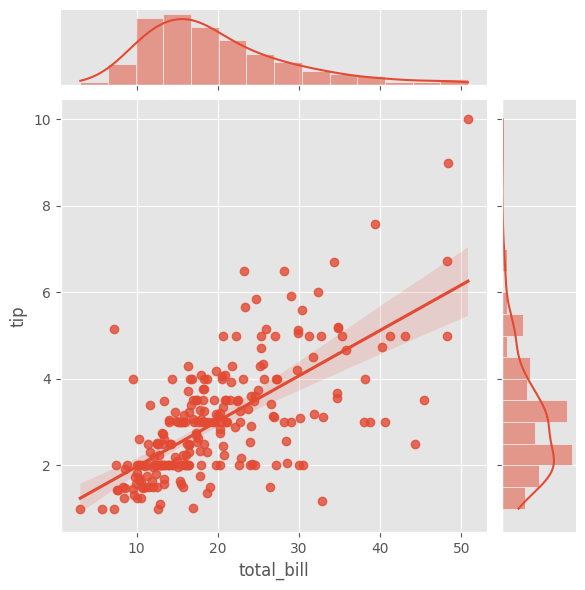

In [ ]:
ax = sns.jointplot(x="total_bill", y="tip", data=df, kind='reg')

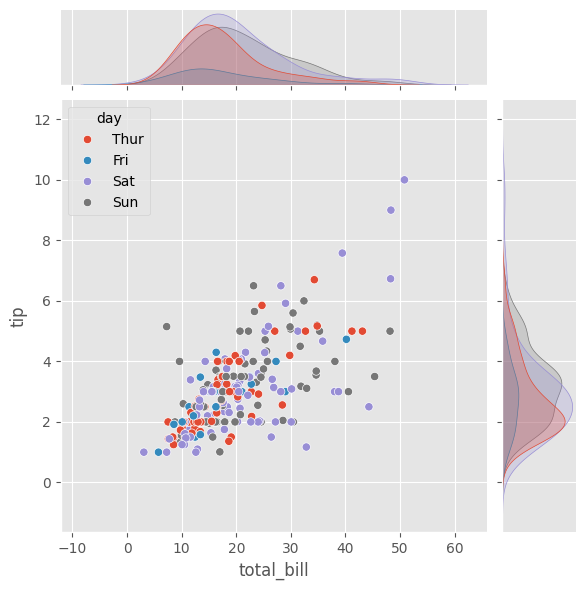

In [ ]:
ax = sns.jointplot(x="total_bill", y="tip", hue='day', data=df)